In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv(r'C:\Users\Malini\OneDrive\Desktop\Dataset\brain_stroke.csv')
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

In [3]:
df['gender']=df['gender'].astype('category')
df['gender']=df['gender'].cat.codes

df['smoking_status']=df['smoking_status'].astype('category')
df['smoking_status']=df['smoking_status'].cat.codes

df['ever_married']=df['ever_married'].astype('category')
df['ever_married']=df['ever_married'].cat.codes

df['work_type']=df['work_type'].astype('category')
df['work_type']=df['work_type'].cat.codes

df['Residence_type']=df['Residence_type'].astype('category')
df['Residence_type']=df['Residence_type'].cat.codes
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [4]:
x= df.iloc[:,[1,2,3,7,8]]
x

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,80.0,0,1,105.92,32.5
2,49.0,0,0,171.23,34.4
3,79.0,1,0,174.12,24.0
4,81.0,0,0,186.21,29.0
...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8
4977,40.0,0,0,191.15,31.1
4978,45.0,1,0,95.02,31.8
4979,40.0,0,0,83.94,30.0


In [5]:
y=df.iloc[:,-1:].values
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [6]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(3735, 5)
(1246, 5)


# Decision tree algo

Text(0, 0.5, 'score')

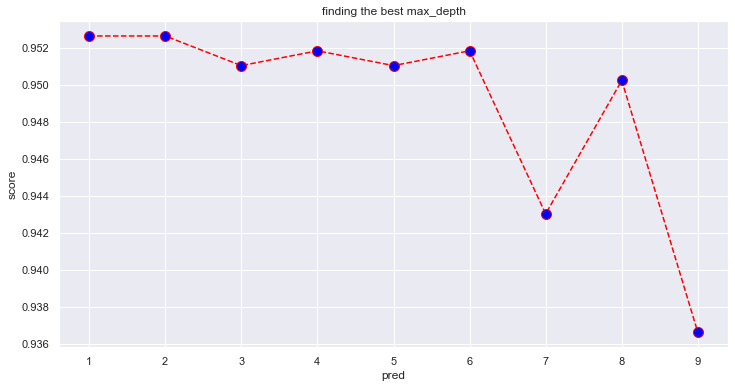

In [7]:
#finding best_max depth

accuracy=[]
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for i in range(1,10):
    model=DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=accuracy_score(y_test,pred)
    accuracy.append(score)
    
plt.figure(figsize=(12,6))
plt.plot(range(1,10),accuracy,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("finding the best max_depth")
plt.xlabel("pred")
plt.ylabel("score")

In [8]:
#training

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [9]:
#prediction for all test data

y_pred=model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [10]:
#confusion matrix and accuracy

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)

print("confusion matrix")

print(cm)
print("accuracy of the model:{0}% ".format(accuracy_score(y_test,y_pred)*100))

confusion matrix
[[1185    2]
 [  59    0]]
accuracy of the model:95.10433386837882% 


[Text(697.5, 951.3000000000001, 'X[0] <= 73.5\ngini = 0.096\nsamples = 3735\nvalue = [3546, 189]'),
 Text(348.75, 679.5, 'X[0] <= 53.5\ngini = 0.059\nsamples = 3310\nvalue = [3210, 100]'),
 Text(174.375, 407.70000000000005, 'X[4] <= 48.85\ngini = 0.019\nsamples = 2351\nvalue = [2329, 22]'),
 Text(87.1875, 135.89999999999998, 'gini = 0.018\nsamples = 2349\nvalue = [2328, 21]'),
 Text(261.5625, 135.89999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(523.125, 407.70000000000005, 'X[3] <= 180.865\ngini = 0.149\nsamples = 959\nvalue = [881, 78]'),
 Text(435.9375, 135.89999999999998, 'gini = 0.112\nsamples = 755\nvalue = [710, 45]'),
 Text(610.3125, 135.89999999999998, 'gini = 0.271\nsamples = 204\nvalue = [171, 33]'),
 Text(1046.25, 679.5, 'X[4] <= 32.95\ngini = 0.331\nsamples = 425\nvalue = [336, 89]'),
 Text(871.875, 407.70000000000005, 'X[3] <= 103.64\ngini = 0.362\nsamples = 350\nvalue = [267, 83]'),
 Text(784.6875, 135.89999999999998, 'gini = 0.303\nsamples = 199\nvalue =

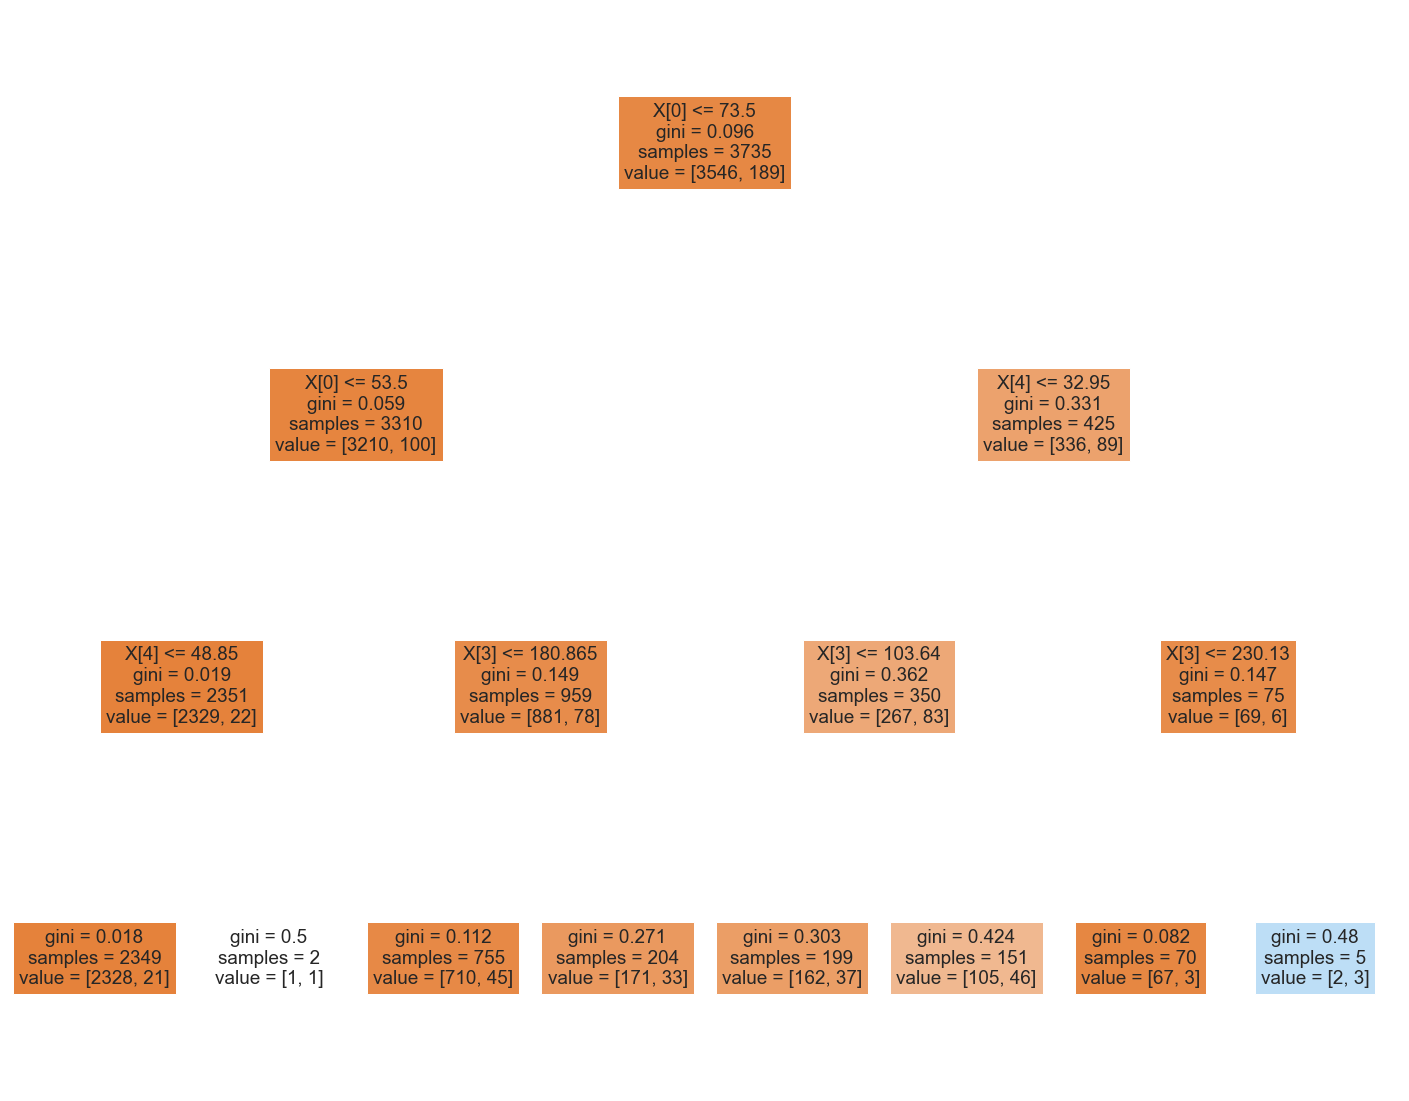

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fig=plt.figure(figsize=(25,20))
a=tree.plot_tree(model,filled=True)
a

# GaussianNB

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=0)

In [13]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [14]:
y_pred=model.predict(x_test)
print(np.column_stack((y_pred,y_test)))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cm=confusion_matrix(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("confusion matrix")
print(f1)
print(cm)
print("Accuracy of the model: {0}%".format(accuracy_score(y_test,y_pred)*100))

confusion matrix
0.23350253807106597
[[1072  115]
 [  36   23]]
Accuracy of the model: 87.88121990369181%


<Axes: >

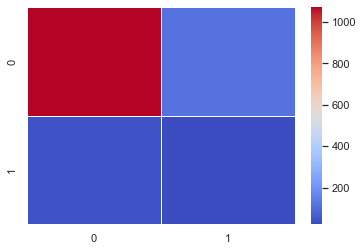

In [16]:
import seaborn as sns
sns.heatmap(cm,linewidth = 0.5 , cmap = 'coolwarm')

# Algorithm comparison

In [17]:
#feature scalling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train)

[[-0.76992324 -0.32760168 -0.24896716  1.37219738 -0.8198263 ]
 [-1.47558671 -0.32760168 -0.24896716 -1.07747037 -1.92339014]
 [-1.47558671 -0.32760168 -0.24896716 -0.78095606 -0.45197169]
 ...
 [ 0.55319576 -0.32760168 -0.24896716  2.62012048  2.10829642]
 [ 0.59729972 -0.32760168 -0.24896716  0.03191736  0.15130988]
 [-1.51969067 -0.32760168 -0.24896716 -0.34966252 -1.43782205]]


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [19]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
print(models)

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('SVM', SVC(gamma='auto'))]


LR: 0.949398
LDA: 0.945114


C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\newfolder\lib\site-packages\sklearn\u

KNN: 0.944310
CART: 0.913261
NB: 0.869070


C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\newfolder\lib\site-packages\sklearn\u

SVM: 0.949398


C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


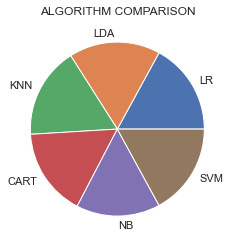

In [20]:
results=[]
names=[]
res=[]
for name,model in models:
    kfold = StratifiedKFold(n_splits=10,random_state=None)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name,cv_results.mean()))
    
plt.pie(res,labels=names)

plt.title('ALGORITHM COMPARISON')
plt.show()


# Kmeans

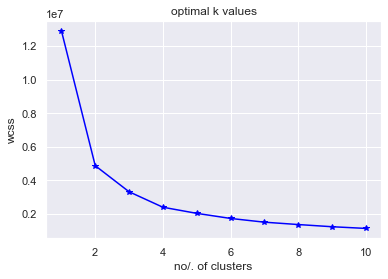

In [21]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color='blue',marker='*')
plt.title('optimal k values')
plt.xlabel('no/. of clusters')
plt.ylabel('wcss')
plt.show()

In [22]:
model=KMeans(n_clusters=7,random_state=0)
y_means=model.fit_predict(x)
y_means

array([1, 4, 5, ..., 4, 6, 2])

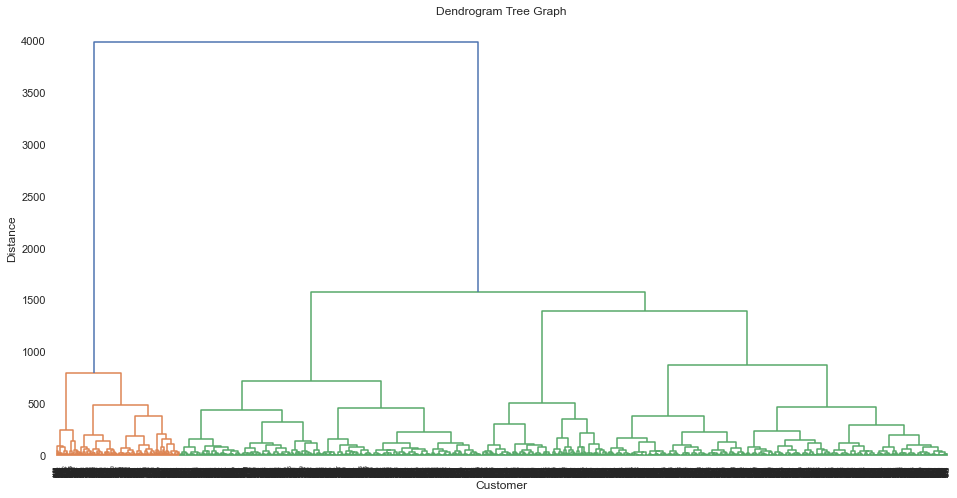

In [23]:
#dendrogram data visualization

import scipy.cluster.hierarchy as clus
plt.figure(1,figsize = (16,8))
dendrogram = clus.dendrogram(clus.linkage(df,method = "ward"))

plt.title("Dendrogram Tree Graph")
plt.xlabel('Customer')
plt.ylabel("Distance")
plt.show()

# LINEAR DICRIMINANT ANALYSIS

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn import metrics

In [25]:
#model train & test
clf=LinearDiscriminantAnalysis()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9475234270414993

In [26]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
#evaluation

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1187
           1       0.22      0.03      0.06        59

    accuracy                           0.95      1246
   macro avg       0.59      0.51      0.52      1246
weighted avg       0.92      0.95      0.93      1246



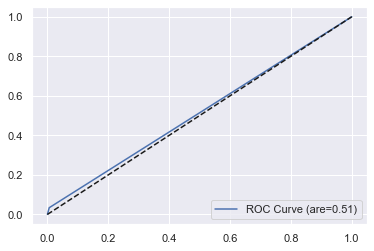

In [28]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr,tpr,label="ROC Curve (are=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")

In [29]:
#prediction using linear discriminant analysis
clf.fit(x_train,y_train)
values=[[40.  ,   0.  ,   0.  ,  83.94,  30.]]
y_pred=clf.predict(values)
print("Prediction using LinearDiscriminatAnalysis")
print(y_pred)
if y_pred==1:
    print("Class:1")
else:
    print("Class:0")

Prediction using LinearDiscriminatAnalysis
[1]
Class:1


C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# KNN ALGORITHM

In [30]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

<ipython-input-30-d00fa17da6b4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)


KNeighborsClassifier()

In [31]:
y_pred = model.predict(x_test)

<ipython-input-32-a8f77f73172c>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-32-a8f77f73172c>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-32-a8f77f73172c>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-32-a8f77f73172c>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-32-a8f77f73172c>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Text(0, 0.5, 'mean error')

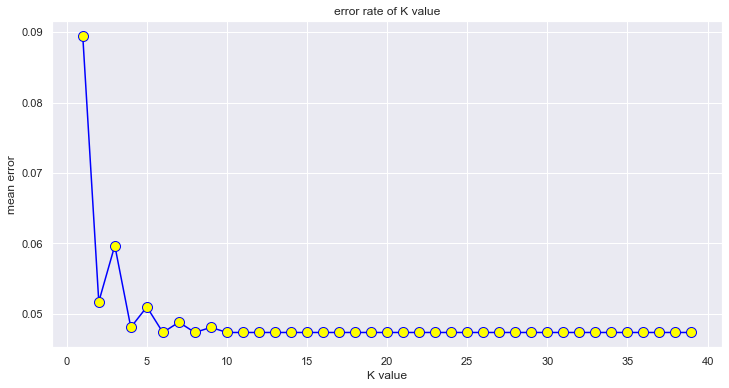

In [32]:
#calculating error for the K values
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i=model.predict(x_test)
    error.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='blue',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('error rate of K value')
plt.xlabel('K value')
plt.ylabel('mean error')

In [33]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1187
           1       0.00      0.00      0.00        59

    accuracy                           0.95      1246
   macro avg       0.48      0.50      0.49      1246
weighted avg       0.91      0.95      0.93      1246

[[1182    5]
 [  59    0]]


In [34]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
values=[[40.  ,   0.  ,   0.  ,  83.94,  30.]]
y_pred=model.predict(values)
print("Prediction using LKNeighborsClassifier")
print(y_pred)
if y_pred==1:
 print("Class: 1")
else:
 print("Class: 0")

Prediction using LKNeighborsClassifier
[1]
Class: 1


<ipython-input-34-80d95d4c3a15>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)


# SVM

In [35]:
from sklearn import svm
model1=svm.SVC(kernel='linear')
model2=svm.SVC(kernel='rbf')
model3=svm.SVC(gamma=0.001)
model4=svm.SVC(gamma=0.001,C=0.1)
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
y_predModel1=model1.predict(x_test)
y_predModel2=model2.predict(x_test)
y_predModel3=model3.predict(x_test)
y_predModel4=model4.predict(x_test)


C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [36]:
model=SVC(gamma='auto')
model.fit(x_train,y_train)
values=[[40.  ,   0.  ,   0.  ,  83.94,  30.]]
y_pred=model.predict(values)
print("Prediction using SVC")
print(y_pred)
if y_pred==1:
 print("Class: 1")
else:
 print("Class: 0")

C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction using SVC
[0]
Class: 0


# logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [38]:
y_pred=model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [39]:
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [40]:
#confusion matrix and accuracy

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print("confussion matrix:",cm)
print("accuracy of the model:{0}%".format(accuracy_score(y_test,y_pred)*100))

confussion matrix: [[1187    0]
 [  59    0]]
accuracy of the model:95.26484751203851%


In [42]:
#predicting 

model=LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(x_train,y_train)
values=[[40.  ,   0.  ,   0.  ,  83.94,  30.]]
y_pred=model.predict(values)
print("Logistic regression")
print(y_pred)
if y_pred==1:
 print("Class: 1")
else:
 print("Class: 0")

Logistic regression
[1]
Class: 1


C:\newfolder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [43]:
##IMPLEMENTATION OF MULTI LINEAR REGRESSION MODEL

In [44]:
da=pd.read_csv(r'C:\Users\Malini\Downloads\insurance.csv')

In [45]:
da['sex']=da['sex'].astype('category')
da['sex']=da['sex'].cat.codes

da['smoker']=da['smoker'].astype('category')
da['smoker']=da['smoker'].cat.codes

da['region']=da['region'].astype('category')
da['region']=da['region'].cat.codes



In [46]:
x=da.iloc[:,:-1].values
x

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [47]:
y=da.iloc[:,-1:].values
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

# IMPLEMENTATION OF MULTI LINEAR REGRESSION MODEL

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [50]:
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
c=lr.intercept_

In [52]:
c

array([-11827.7331418])

In [53]:
m=lr.coef_
m

array([[  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
        23400.28378787,  -276.31576201]])

In [54]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([[ 2074.0645306 ],
       [ 8141.81393908],
       [18738.94132528],
       [ 7874.86959064],
       [ 6305.12726989],
       [ 2023.19725425],
       [26861.18663021],
       [14932.93021746],
       [10489.56733846],
       [16254.02800921],
       [11726.39324257],
       [11284.0092172 ],
       [39312.16870908],
       [ 5825.91078917],
       [12314.92042527],
       [ 3164.68427134],
       [15406.30681252],
       [ 4648.58167988],
       [ 5011.79585436],
       [ 6012.4796038 ],
       [15349.49652486],
       [ 8970.97358853],
       [ 8780.43012222],
       [34229.60622887],
       [ 6700.80932636],
       [26943.25864121],
       [27280.48004482],
       [15477.83837581],
       [ 8825.62578924],
       [34394.38378457],
       [10177.85528603],
       [ 3901.18161227],
       [15608.58732963],
       [29584.76846515],
       [29453.37088923],
       [28132.67012427],
       [10003.22154888],
       [33049.08935397],
       [ 3963.45204974],
       [25461.54857001],


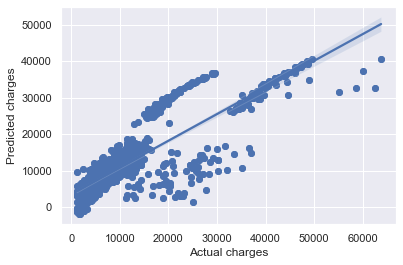

In [55]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
sns.regplot(x=y_train,y=y_pred_train)
plt.show()

In [56]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.7306840408360218

In [57]:
y_pred_test=lr.predict(x_test)
y_pred_test

array([[11051.54909755],
       [ 9821.28110689],
       [37867.57220923],
       [16125.70579228],
       [ 6920.27132517],
       [ 3879.38549816],
       [ 1448.91928088],
       [14390.17797974],
       [ 9022.95151353],
       [ 7458.83371884],
       [ 4584.60125463],
       [10309.9886336 ],
       [ 8693.03891958],
       [ 4085.25393494],
       [27551.60737718],
       [11151.0640722 ],
       [11243.0536825 ],
       [ 5962.9521121 ],
       [ 8181.9015666 ],
       [26750.7993431 ],
       [33448.59842228],
       [14350.03320383],
       [11672.89478465],
       [32235.7832204 ],
       [ 4326.07702625],
       [ 9096.53607025],
       [ 1045.25196369],
       [10177.76672094],
       [ 4042.60346751],
       [10384.28681219],
       [ 9035.98983755],
       [40123.71002379],
       [15507.20819083],
       [13678.264976  ],
       [24481.97362849],
       [ 5059.21988589],
       [12889.80609711],
       [30333.92625689],
       [33301.25091403],
       [ 3431.35787088],


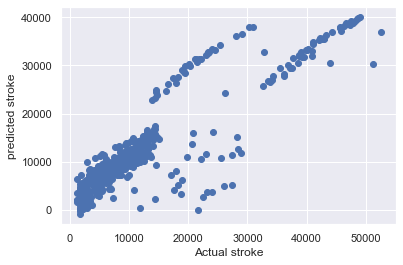

In [58]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual stroke")
plt.ylabel("predicted stroke")
plt.show()


In [59]:
r2_score(y_test,y_pred_test)

0.7911113876316934